In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [2]:
loans_df_2 = pd.read_csv('/Users/temp/Downloads/Loan Default Prediction - Student Files/loans_df_2')

In [3]:
loans_df_2.columns

Index(['Unnamed: 0', 'UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV',
       'MANUFACTURER_ID', 'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG',
       'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG',
       'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS',
       'DISBURSED_BINS', 'TOTAL_NO_OF_ACCTS', 'TOTAL_ACTIVE_ACCTS',
       'TOTAL_OVERDUE_ACCTS', 'TOTAL_CURRENT_BALANCE',
       'TOTAL_SANCTIONED_AMOUNT', 'TOTAL_DISBURSED_AMOUNT', 'TOTAL_INSTAL_AMT',
       'OVERDUE_PERCENT', 'DISBURSAL_DIFFERENCE'],
      dtype='object')

In [4]:
loans_df_2['STATE_ID'] = loans_df_2['STATE_ID'].astype('category')

In [5]:
loans_df_sml = loans_df_2[['STATE_ID','LOAN_DEFAULT','PERFORM_CNS_SCORE','LTV','DISBURSED_BINS','DISBURSAL_MONTH','OVERDUE_PERCENT']]

In [6]:
loans_df_sml_dm = pd.get_dummies(loans_df_sml,drop_first=True)

In [7]:
loans_df_sml_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOAN_DEFAULT               233154 non-null  int64  
 1   PERFORM_CNS_SCORE          233154 non-null  int64  
 2   LTV                        233154 non-null  float64
 3   DISBURSAL_MONTH            233154 non-null  int64  
 4   OVERDUE_PERCENT            233154 non-null  float64
 5   STATE_ID_2                 233154 non-null  uint8  
 6   STATE_ID_3                 233154 non-null  uint8  
 7   STATE_ID_4                 233154 non-null  uint8  
 8   STATE_ID_5                 233154 non-null  uint8  
 9   STATE_ID_6                 233154 non-null  uint8  
 10  STATE_ID_7                 233154 non-null  uint8  
 11  STATE_ID_8                 233154 non-null  uint8  
 12  STATE_ID_9                 233154 non-null  uint8  
 13  STATE_ID_10                23

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logit = LogisticRegression(max_iter=400)

In [10]:
X= loans_df_sml_dm.drop('LOAN_DEFAULT',axis=1)
y= loans_df_sml_dm['LOAN_DEFAULT']

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [12]:
logit.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [13]:
preds = logit.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
logit.score(X_test,y_test)

0.7820763011730394

## Model Eval

In [15]:
confusion_matrix(y_test,preds)

array([[36445,    32],
       [10130,    24]])

In [16]:
precision_score(y_test,preds)

0.42857142857142855

In [17]:
recall_score(y_test,preds)

0.0023636005515067955

In [18]:
f1_score(y_test,preds)

0.004701273261508325

## ROC Curve
1. pred probability

In [19]:
predicted_prob = logit.predict_proba(X_test)

In [20]:
predicted_prob

array([[0.68904645, 0.31095355],
       [0.80561799, 0.19438201],
       [0.74058118, 0.25941882],
       ...,
       [0.79787981, 0.20212019],
       [0.89352153, 0.10647847],
       [0.77998859, 0.22001141]])

In [21]:
predicted_prob.shape

(46631, 2)

In [22]:
prob_df = pd.DataFrame()

In [23]:
prob_df['0'] = predicted_prob[:,0]
prob_df['1'] = predicted_prob[:,1]

In [24]:
prob_df['1']

0        0.310954
1        0.194382
2        0.259419
3        0.239418
4        0.207505
           ...   
46626    0.262513
46627    0.167418
46628    0.202120
46629    0.106478
46630    0.220011
Name: 1, Length: 46631, dtype: float64

In [25]:
prob_df.describe()

,0,1
count,46631.000000,46631.000000
mean,0.783407,0.216593
std,0.070415,0.070415
min,0.371134,0.033811
25%,0.740010,0.168352
50%,0.787113,0.212887
75%,0.831648,0.259990
max,0.966189,0.628866


In [26]:
#plotting
fpr,tpr,threshold = roc_curve(y_test,prob_df['1'],pos_label=1)

In [27]:
print('FPR: ', fpr)
print('TPR: ', tpr)
print('Threshold: ', threshold)

FPR:  [0.00000000e+00 2.74145352e-05 8.22436056e-05 ... 9.99835513e-01
 9.99835513e-01 1.00000000e+00]
TPR:  [0.         0.         0.         ... 0.99990152 1.         1.        ]
Threshold:  [1.62886631 0.62886631 0.60028671 ... 0.04727671 0.04706298 0.03381073]


In [28]:
roc_df = pd.DataFrame()

In [29]:
roc_df['fpr'] = fpr 
roc_df['tpr'] = tpr
roc_df['threshold'] = threshold

In [30]:
roc_df.describe()

,fpr,tpr,threshold
count,16475.000000,16475.000000,16475.000000
mean,0.411093,0.527197,0.231952
std,0.277099,0.284024,0.070507
min,0.000000,0.000000,0.033811
25%,0.168928,0.286488,0.185241
50%,0.379116,0.539886,0.227062
75%,0.632261,0.773538,0.272233
max,1.000000,1.000000,1.628866


In [31]:
roc_auc = auc(fpr,tpr)

In [32]:
print('AUC: ', roc_auc)

AUC:  0.6136385630530719


## ROC Curve Function

In [33]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

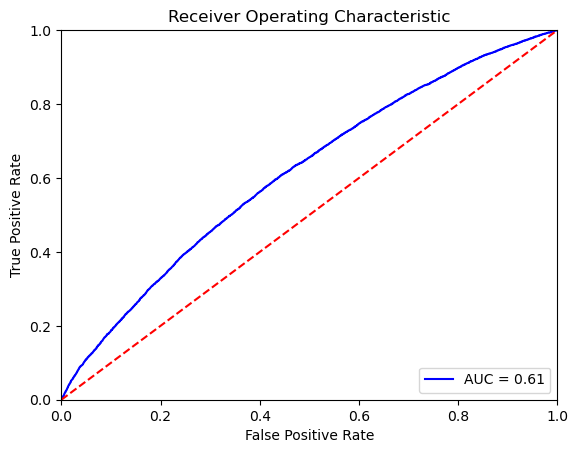

In [34]:
plot_roc_curve(fpr,tpr,roc_auc)

## Advanced Evaluation

In [35]:
results_df = pd.DataFrame()

In [36]:
results_df['true_class'] = y_test
results_df['predicted_class'] = list(preds)
results_df['default_prob'] = predicted_prob[:,1]

In [37]:
results_df

,true_class,predicted_class,default_prob
1197,1,0,0.310954
109250,0,0,0.194382
171069,0,0,0.259419
227346,0,0,0.239418
136799,0,0,0.207505
...,...,...,...
82125,0,0,0.262513
127030,0,0,0.167418
125013,0,0,0.202120
11053,0,0,0.106478


In [38]:
results_df[['true_class','predicted_class']].value_counts()

true_class  predicted_class
0           0                  36445
1           0                  10130
0           1                     32
1           1                     24
dtype: int64

In [39]:
# TPR = TP/TP+FN
TPR = 24/(24+10130)
TPR

0.0023636005515067955

In [40]:
# FPR = FP/(FP+TN)
FPR = 32/(32+36445)
FPR

0.0008772651259697892

In [41]:
results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True)

true_class  predicted_class
0           0                  0.999123
            1                  0.000877
1           0                  0.997636
            1                  0.002364
Name: predicted_class, dtype: float64

In [42]:
prob_default_f = results_df[results_df['true_class'] == 0]['default_prob']

In [43]:
prob_default_t = results_df[results_df['true_class'] == 1]['default_prob']

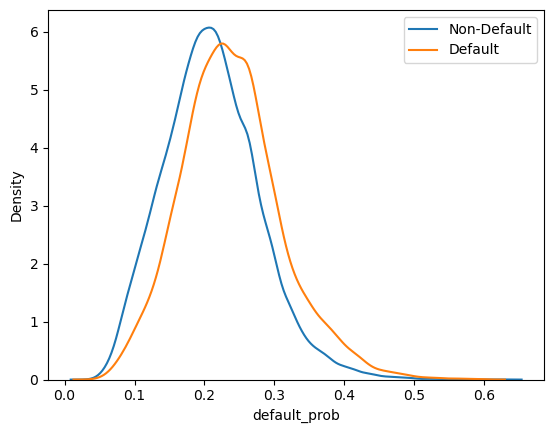

In [44]:
sns.kdeplot(prob_default_f,label='Non-Default')
sns.kdeplot(prob_default_t,label='Default')
plt.legend()
plt.show()

## Model Eval Function

In [46]:
def eval_model_2(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes
    sns.kdeplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default")
    sns.kdeplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default")
    plt.show()

    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))



Accuracy:  0.7820763011730394
Precision:  0.42857142857142855
Recall:  0.0023636005515067955
F1:  0.004701273261508325
AUC:  0.6136385630530719


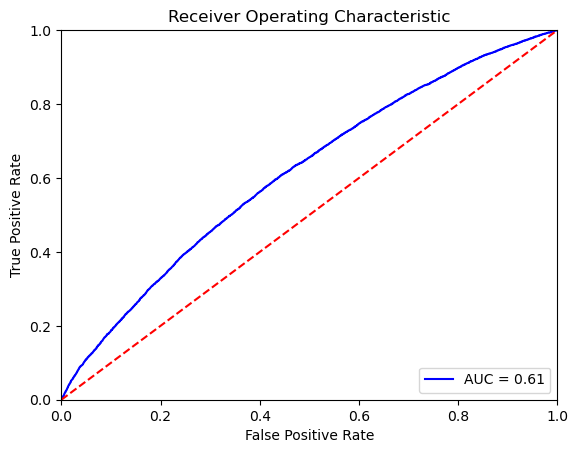

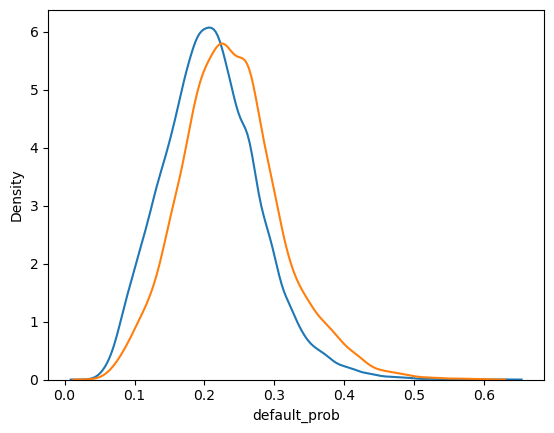

true_class  predicted_class
0           0                  0.999123
            1                  0.000877
1           0                  0.997636
            1                  0.002364
Name: predicted_class, dtype: float64


In [47]:
eval_model_2(logit,X_test,y_test)